## Pandas exercises

### Step 1:
    
Use the **`babynames.csv`** file to create a DataFrame.

Print some information about the DataFrame and it's first five rows.

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # default is 'last'

import pandas as pd
df = pd.read_csv('./datasets/babynames.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276087 entries, 0 to 276086
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Id1     276086 non-null  float64
 1   Id2     276086 non-null  float64
 2   Name    276085 non-null  object 
 3   Year    276085 non-null  float64
 4   Gender  276085 non-null  object 
 5   State   276085 non-null  object 
 6   Count   276085 non-null  float64
dtypes: float64(4), object(3)
memory usage: 14.7+ MB


,Id1,Id2,Name,Year,Gender,State,Count
0,11349.0,11350.0,Emma,2004.0,F,AK,62.0
1,11350.0,11351.0,Madison,2004.0,F,AK,48.0
2,11351.0,11352.0,Hannah,2004.0,F,AK,46.0
3,11352.0,11353.0,Grace,2004.0,F,AK,44.0
4,11353.0,11354.0,Emily,2004.0,F,AK,41.0


### Step 2:

Delete the column **`Id1`** and **`Id2`**

In [3]:
df.drop(['Id1','Id2'], axis=1, inplace=True)
df.head()


,Name,Year,Gender,State,Count
0,Emma,2004.0,F,AK,62.0
1,Madison,2004.0,F,AK,48.0
2,Hannah,2004.0,F,AK,46.0
3,Grace,2004.0,F,AK,44.0
4,Emily,2004.0,F,AK,41.0


### Step 3:

Are there more male or female names in the dataset?

In [4]:
df['Gender'].value_counts()

F    156721
M    119364
Name: Gender, dtype: int64

### Step 4:

How many different names exist in the dataset?

In [5]:
df['Name'].value_counts().size
#or
len(df['Name'].value_counts())
#or
df['Name'].nunique() # <====
#or
len(df['Name'].unique())

df[df["Name"].isnull()]

13900

13900

13900

13901

,Name,Year,Gender,State,Count
276081,NaN,NaN,NaN,NaN,NaN
276086,NaN,NaN,NaN,NaN,NaN


### Step 5:

What is the name with most occurrences?

In [6]:
names=df.groupby('Name')['Count'].sum()
names
names.sort_values(ascending=False, inplace=True)
print(names.index[0],names[0])

Name
Aadan           18.0
Aaden         1125.0
Aadhav           6.0
Aadhya         149.0
Aadi           110.0
               ...  
Zyquavious       6.0
Zyra            21.0
Zyrah            5.0
Zyria           18.0
Zyriah          10.0
Name: Count, Length: 13900, dtype: float64

Jacob 73370.0


In [7]:
names=df.groupby('Name')['Count'].sum()
print(names.idxmax(), names.max())

Jacob 73370.0


### Step 6:

How many different names have the least occurrences?

In [8]:
names=df.groupby('Name')['Count'].sum()
len(names[names.min() == names])

2002

### Step 7:

Does the Name column contains any `NaN` value ?<br>
What are the indexes of the corresponding rows?

In [9]:
df['Name'].isnull().sum()
df[df['Name'].isnull()]


2

,Name,Year,Gender,State,Count
276081,NaN,NaN,NaN,NaN,NaN
276086,NaN,NaN,NaN,NaN,NaN


### Step 8:

Remove the rows that contains a `NaN` value in the `Name` column

In [10]:
df.drop(df[df['Name'].isnull()].index, axis=0, inplace=True)
df['Name'].isnull().sum() # Just to check ...

#or
df.dropna(how='all', axis=0, inplace=True)

0

### Step 9:

List all the unique names that contain the sub-string **'ver'**:

In [11]:
df[df['Name'].str.contains('ver')].Name.unique()
#or
df[df['Name'].str.contains('ver')]["Name"].unique()

array(['Avery', 'River', 'Everly', 'Oliver', 'Everett', 'Maverick',
       'Beverly', 'Averie', 'Averi', 'Everleigh', 'Denver', 'Ever',
       'Rivers', 'Everlee', 'Averee', 'Everardo', 'Trever', 'Guinevere',
       'Clover', 'Waverly', 'Gwenevere', 'Everley', 'Silver', 'Gwenivere',
       'Everlyn', 'Everlynn', 'Averey', 'Xaiver', 'Silverio', 'Everest',
       'Severin', 'Iverson', 'Maverik', 'Carver', 'Iver', 'Maveric',
       'Everette'], dtype=object)

array(['Avery', 'River', 'Everly', 'Oliver', 'Everett', 'Maverick',
       'Beverly', 'Averie', 'Averi', 'Everleigh', 'Denver', 'Ever',
       'Rivers', 'Everlee', 'Averee', 'Everardo', 'Trever', 'Guinevere',
       'Clover', 'Waverly', 'Gwenevere', 'Everley', 'Silver', 'Gwenivere',
       'Everlyn', 'Everlynn', 'Averey', 'Xaiver', 'Silverio', 'Everest',
       'Severin', 'Iverson', 'Maverik', 'Carver', 'Iver', 'Maveric',
       'Everette'], dtype=object)

### Step 10:

Convert the `Year` colum into `int`.

Count how many rows do concern year 2007 or 2008.


In [12]:
# Conversion of the column Year 

df.Year=df.Year.astype(int)
#or
# df["Year"]=df["Year"].astype(int)

res=df[(df.Year==2008) | (df.Year==2007)]

res.info()
res.Year.size
len(res)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52021 entries, 639 to 273669
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    52021 non-null  object 
 1   Year    52021 non-null  int32  
 2   Gender  52021 non-null  object 
 3   State   52021 non-null  object 
 4   Count   52021 non-null  float64
dtypes: float64(1), int32(1), object(3)
memory usage: 2.2+ MB


52021

52021

### Step 11:

Print the frequencies of the name `Denver` by year.

2004
          Name  Year Gender State  Count
109158  Denver  2004      M    CA    8.0
210106  Denver  2004      M    FL    6.0
248930  Denver  2004      M    GA   11.0
2005
          Name  Year Gender State  Count
31439   Denver  2005      M    AR    6.0
111562  Denver  2005      M    CA   11.0
211727  Denver  2005      M    FL    7.0
250432  Denver  2005      M    GA    8.0
2006
          Name  Year Gender State  Count
31939   Denver  2006      M    AR    8.0
115108  Denver  2006      M    CA    6.0
213699  Denver  2006      M    FL    6.0
252048  Denver  2006      M    GA    6.0
2007
          Name  Year Gender State  Count
118400  Denver  2007      M    CA    5.0
215004  Denver  2007      M    FL   12.0
253150  Denver  2007      M    GA   10.0
2008
          Name  Year Gender State  Count
18546   Denver  2008      M    AL    5.0
33175   Denver  2008      M    AR    7.0
120044  Denver  2008      M    CA   14.0
216996  Denver  2008      M    FL   10.0
237257  Denver  2008      F    G

Year
2004    25.0
2005    32.0
2006    26.0
2007    27.0
2008    43.0
2009    21.0
2010    20.0
2011    25.0
2012    34.0
2013    33.0
2014    69.0
Name: Count, dtype: float64

pandas.core.series.Series

<AxesSubplot:xlabel='Year'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '2004'),
  Text(1, 0, '2005'),
  Text(2, 0, '2006'),
  Text(3, 0, '2007'),
  Text(4, 0, '2008'),
  Text(5, 0, '2009'),
  Text(6, 0, '2010'),
  Text(7, 0, '2011'),
  Text(8, 0, '2012'),
  Text(9, 0, '2013'),
  Text(10, 0, '2014')])

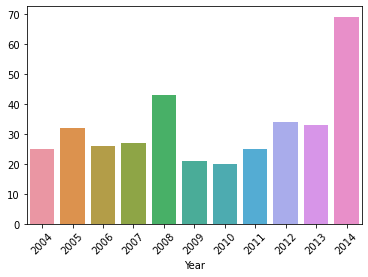

In [23]:
#res=df[df['Name']=='Denver'].groupby('Year').Count.sum()
res=df[df['Name']=='Denver'].groupby('Year')

for element in res:
    print(element[0])
    print(element[1])
    

res=df[df['Name']=='Denver'].groupby('Year')["Count"].sum()
# To plot the result via Pandas:
#res.plot.bar()
res
type(res)

# To plot the result via Seaborn:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=res.index, y=res.values)
plt.xticks(rotation=45)